In [39]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyabf
import os

In [815]:
abf = pyabf.ABF(r"C:\Users\electrophysiology\17_11_20_0010.abf")
print("\033[1m" + str(abf) + "\033[0m")

ABF (version 2.0.0.0) with 2 channels (mV, pA), sampled at 10.0 kHz, containing 6 sweeps, having no tags, with a total length of 0.23 minutes, recorded with protocol "a_pulse_CH1".


In [816]:
# No. of Sweeps in the file 
print('Number of sweeps in this file:' ,abf.sweepCount)

Number of sweeps in this file: 6


In [817]:
abf.setSweep(1)
print("sweep data (ADC):", abf.sweepY)
print("sweep command (DAC):", abf.sweepC)
print("sweep times (seconds):", abf.sweepX)

sweep data (ADC): [-94.3237 -94.2932 -94.2322 ... -94.812  -94.9341 -94.8608]
sweep command (DAC): [0. 0. 0. ... 0. 0. 0.]
sweep times (seconds): [0.     0.0001 0.0002 ... 1.9997 1.9998 1.9999]


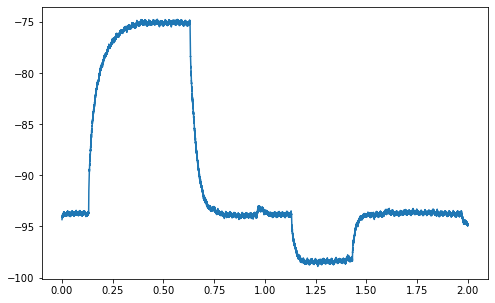

In [818]:
# Template sweep from the loaded file
abf.setSweep(1)
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepX, abf.sweepY)
plt.show()

In [819]:
#Negative

first_level_neg= -0.01   # Enter the time range which you want to use as the baseline
delta_level_neg = -0.01
stimulus_region_neg= [1.3,1.4]
baseline_voltage=abf.sweepY[np.where(abf.sweepX==1)[0][0]]

In [820]:
# mean_sweep[int(Stimulus_Region[0]*10000),int(Stimulus_Region[1]*10000),15000]
a=[val for i,val in enumerate(abf.sweepX) if i>stimulus_region_neg[0]*10000 and i<stimulus_region_neg[1]*10000]
b=[val for i,val in enumerate(abf.sweepY) if i>stimulus_region_neg[0]*10000 and i<stimulus_region_neg[1]*10000]

#plt.plot(b, a, alpha=.8, label="Avg %d" %(i))
#plt.axvline(x=b[np.where(a==min(a))[0][0]-15])

In [821]:
mean_sweep= np.mean(b,axis=0)

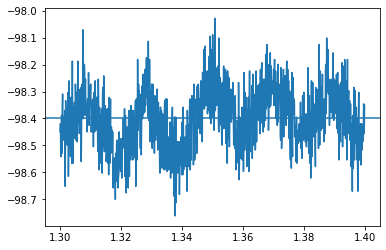

In [822]:
# Sample plot of the recording from the negative current injection

plt.plot(a,b)
plt.axhline(mean_sweep)

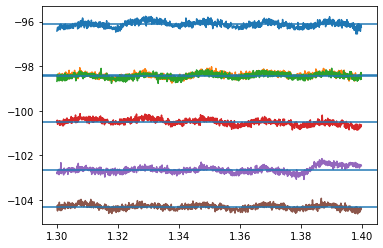

In [823]:
#This codes calculates the average value of the voltage by negative current injection per sweep.

sweep=[]

for i in range(0,abf.sweepCount):
    abf.setSweep(i)
    a=[val for i,val in enumerate(abf.sweepX) if i>stimulus_region_neg[0]*10000 and i<stimulus_region_neg[1]*10000]
    b=[val for i,val in enumerate(abf.sweepY) if i>stimulus_region_neg[0]*10000 and i<stimulus_region_neg[1]*10000]
    mean_sweep= np.mean(b,axis=0)
    sweep.append(mean_sweep-baseline_voltage)
    plt.plot(a,b)
    plt.axhline(mean_sweep)

In [824]:
current=np.arange(first_level_neg,(delta_level_neg*(abf.sweepCount)-0.001),delta_level_neg).tolist()

In [825]:
sweep

[-2.5274734, -4.8023224, -4.8391876, -6.912895, -9.05072, -10.72541]

In [826]:
current

[-0.01, -0.02, -0.03, -0.04, -0.05, -0.060000000000000005]

In [827]:
m, b = np.polyfit(current,sweep, 1)

slope is 159.45310320172982 Mega Ohm


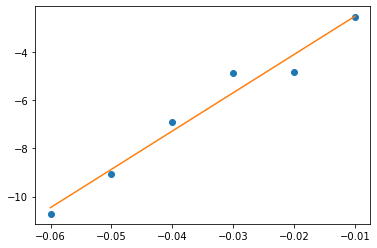

In [828]:
plt.plot(current,sweep, 'o')
plt.plot(current, np.poly1d(np.polyfit(current, sweep, 1))(current))
print('slope is', m,'Mega Ohm')